In [1]:
#Imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from kmodes.kmodes import KModes

In [49]:
#Filename
INPUT_FILE = 'processed-dataset-new.csv'
#Read the csv file and put it into dataframe
kmeansdf = pd.read_csv(INPUT_FILE, header = 0)

In [50]:
kmeansdf

,CRM_ATPT_CPTD_CD,LAW_CAT_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,PATROL_BORO,PREM_TYP_DESC,OFNS_DESC
0,COMPLETED,VIOLATION,25-44,BLACK,M,65+,BLACK,M,PATROL BORO BKLYN SOUTH,RESIDENCE-HOUSE,HARRASSMENT 2
1,COMPLETED,VIOLATION,25-44,WHITE,M,25-44,WHITE,F,PATROL BORO BKLYN SOUTH,RESIDENCE-HOUSE,HARRASSMENT 2
2,COMPLETED,FELONY,25-44,BLACK,F,45-64,BLACK HISPANIC,M,PATROL BORO BKLYN NORTH,OTHER,FELONY ASSAULT
3,COMPLETED,FELONY,25-44,BLACK,M,<18,BLACK,F,PATROL BORO BKLYN SOUTH,STREET,FELONY ASSAULT
4,COMPLETED,MISDEMEANOR,<18,BLACK,M,<18,BLACK,M,PATROL BORO BKLYN NORTH,STREET,ASSAULT 3 & RELATED OFFENSES
...,...,...,...,...,...,...,...,...,...,...,...
166712,COMPLETED,FELONY,25-44,BLACK,M,UNKNOWN,UNKNOWN,E,PATROL BORO BKLYN SOUTH,STREET,FORGERY
166713,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,M,18-24,WHITE,M,PATROL BORO BKLYN NORTH,RESIDENCE - APT. HOUSE,OFF. AGNST PUB ORD SENSBLTY &
166714,COMPLETED,FELONY,45-64,WHITE HISPANIC,F,65+,WHITE HISPANIC,F,PATROL BORO BKLYN SOUTH,RESIDENCE - PUBLIC HOUSING,FELONY ASSAULT
166715,COMPLETED,VIOLATION,25-44,BLACK,M,65+,ASIAN / PACIFIC ISLANDER,M,PATROL BORO BKLYN SOUTH,GAS STATION,HARRASSMENT 2


In [51]:
#Create features array
features = ['CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'PATROL_BORO', 'PREM_TYP_DESC', 'OFNS_DESC']

In [52]:
kmeansdf.shape

(166717, 11)

In [53]:
kmeansdf = kmeansdf[ 
(kmeansdf['PREM_TYP_DESC'] == 'RESIDENCE - APT. HOUSE') |
(kmeansdf['PREM_TYP_DESC'] == 'STREET') |
(kmeansdf['PREM_TYP_DESC'] == 'RESIDENCE-HOUSE') |
(kmeansdf['PREM_TYP_DESC'] == 'RESIDENCE - PUBLIC HOUSING') |
(kmeansdf['PREM_TYP_DESC'] == 'CHAIN STORE') |
(kmeansdf['PREM_TYP_DESC'] == 'OTHER') |
(kmeansdf['PREM_TYP_DESC'] == 'TRANSIT - NYC SUBWAY') |
(kmeansdf['PREM_TYP_DESC'] == 'COMMERCIAL BUILDING') |
(kmeansdf['PREM_TYP_DESC'] == 'GROCERY/BODEGA') |
(kmeansdf['PREM_TYP_DESC'] == 'DEPARTMENT STORED')
]

In [54]:
kmeansdf.groupby('PREM_TYP_DESC').PREM_TYP_DESC.value_counts().nlargest(10)

PREM_TYP_DESC               PREM_TYP_DESC             
STREET                      STREET                        45136
RESIDENCE - APT. HOUSE      RESIDENCE - APT. HOUSE        41483
RESIDENCE-HOUSE             RESIDENCE-HOUSE               16411
RESIDENCE - PUBLIC HOUSING  RESIDENCE - PUBLIC HOUSING    15274
CHAIN STORE                 CHAIN STORE                    5740
OTHER                       OTHER                          4830
GROCERY/BODEGA              GROCERY/BODEGA                 4077
TRANSIT - NYC SUBWAY        TRANSIT - NYC SUBWAY           4063
COMMERCIAL BUILDING         COMMERCIAL BUILDING            3474
Name: PREM_TYP_DESC, dtype: int64

In [55]:
kmeansdf = kmeansdf[ 
(kmeansdf['OFNS_DESC'] == 'HARRASSMENT 2') |
(kmeansdf['OFNS_DESC'] == 'PETIT LARCENY') |
(kmeansdf['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES') |
(kmeansdf['OFNS_DESC'] == 'CRIMINAL MISCHIEF & RELATED OF') |
(kmeansdf['OFNS_DESC'] == 'GRAND LARCENY') |
(kmeansdf['OFNS_DESC'] == 'OFF. AGNST PUB ORD SENSBLTY &') |
(kmeansdf['OFNS_DESC'] == 'FELONY ASSAULTY') |
(kmeansdf['OFNS_DESC'] == 'MISCELLANEOUS PENAL LAW') |
(kmeansdf['OFNS_DESC'] == 'ROBBERY') |
(kmeansdf['OFNS_DESC'] == 'DANGEROUS DRUGS')
]

In [56]:
kmeansdf

,CRM_ATPT_CPTD_CD,LAW_CAT_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,PATROL_BORO,PREM_TYP_DESC,OFNS_DESC
0,COMPLETED,VIOLATION,25-44,BLACK,M,65+,BLACK,M,PATROL BORO BKLYN SOUTH,RESIDENCE-HOUSE,HARRASSMENT 2
1,COMPLETED,VIOLATION,25-44,WHITE,M,25-44,WHITE,F,PATROL BORO BKLYN SOUTH,RESIDENCE-HOUSE,HARRASSMENT 2
4,COMPLETED,MISDEMEANOR,<18,BLACK,M,<18,BLACK,M,PATROL BORO BKLYN NORTH,STREET,ASSAULT 3 & RELATED OFFENSES
7,COMPLETED,FELONY,<18,BLACK,M,<18,WHITE,F,PATROL BORO BKLYN SOUTH,STREET,ROBBERY
8,COMPLETED,VIOLATION,UNKNOWN,UNKNOWN,U,25-44,BLACK,M,PATROL BORO BKLYN SOUTH,STREET,HARRASSMENT 2
...,...,...,...,...,...,...,...,...,...,...,...
166706,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,45-64,UNKNOWN,M,PATROL BORO BKLYN SOUTH,OTHER,PETIT LARCENY
166707,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,25-44,UNKNOWN,M,PATROL BORO BKLYN NORTH,STREET,CRIMINAL MISCHIEF & RELATED OF
166709,COMPLETED,MISDEMEANOR,25-44,BLACK,M,25-44,BLACK,F,PATROL BORO BKLYN SOUTH,RESIDENCE - APT. HOUSE,ASSAULT 3 & RELATED OFFENSES
166710,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,25-44,BLACK,M,PATROL BORO BKLYN NORTH,RESIDENCE - PUBLIC HOUSING,ASSAULT 3 & RELATED OFFENSES


In [57]:
kmeansdf.groupby('OFNS_DESC').OFNS_DESC.value_counts().nlargest(10)

OFNS_DESC                       OFNS_DESC                     
HARRASSMENT 2                   HARRASSMENT 2                     29265
ASSAULT 3 & RELATED OFFENSES    ASSAULT 3 & RELATED OFFENSES      20041
PETIT LARCENY                   PETIT LARCENY                     16947
CRIMINAL MISCHIEF & RELATED OF  CRIMINAL MISCHIEF & RELATED OF    10496
OFF. AGNST PUB ORD SENSBLTY &   OFF. AGNST PUB ORD SENSBLTY &      8627
MISCELLANEOUS PENAL LAW         MISCELLANEOUS PENAL LAW            7842
GRAND LARCENY                   GRAND LARCENY                      7101
ROBBERY                         ROBBERY                            5647
DANGEROUS DRUGS                 DANGEROUS DRUGS                    3722
Name: OFNS_DESC, dtype: int64

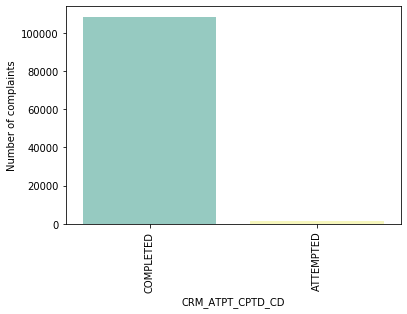

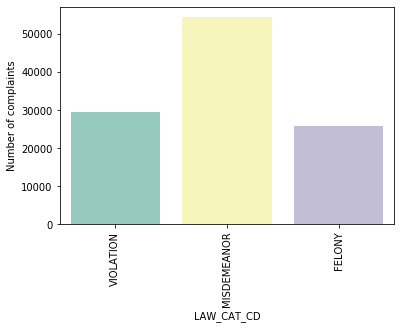

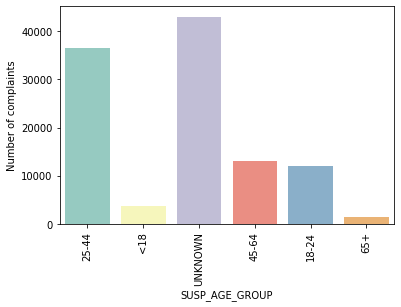

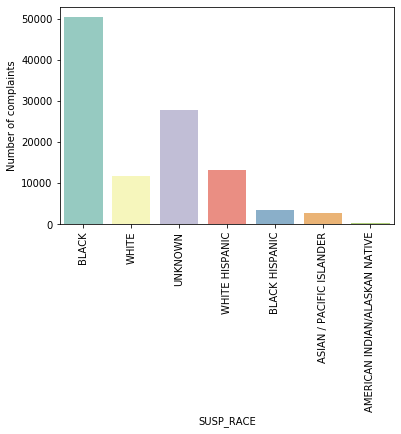

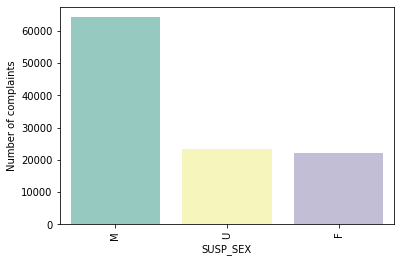

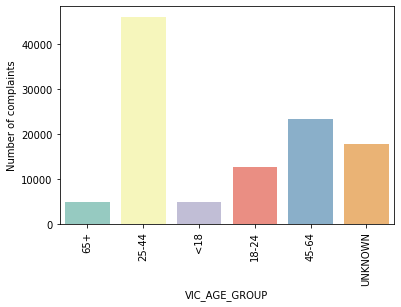

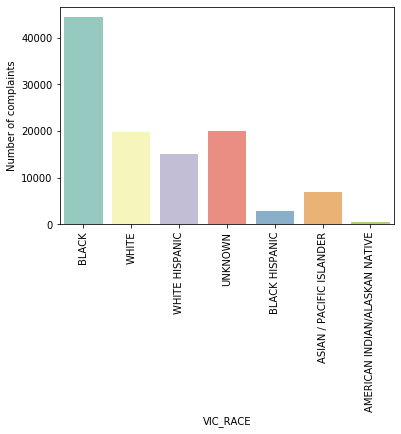

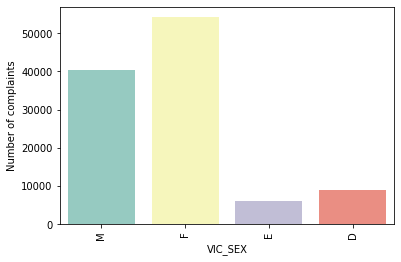

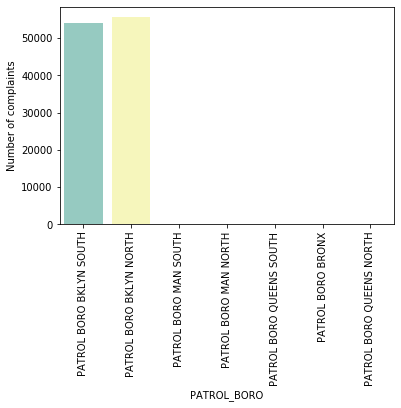

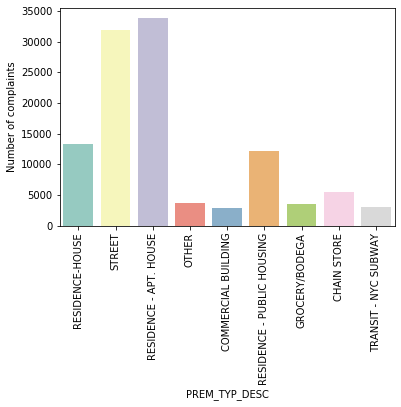

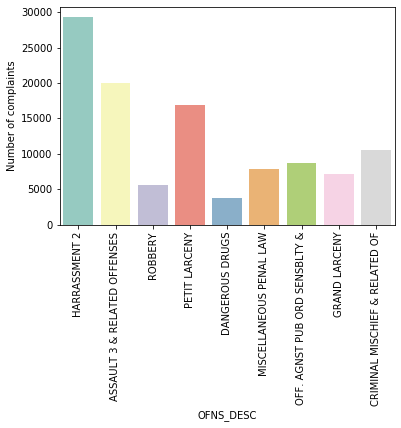

In [96]:
#Plot all the features that are in our dataset to get better understanding
for feature in features:
    sns.countplot(x = feature, data = kmeansdf, palette = 'Set3')
    plt.xticks(rotation=90)
    plt.ylabel('Number of complaints')    
    plt.show()


In [108]:
#Make a copy of our original dataset
kmeansDataCopy = kmeansdf[features]
kmeansDataCopy.shape

(109688, 11)

In [109]:
kmeansWithDummies = pd.get_dummies(kmeansDataCopy, columns = features)

In [110]:
kmeansWithDummies

,CRM_ATPT_CPTD_CD_ATTEMPTED,CRM_ATPT_CPTD_CD_COMPLETED,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION,SUSP_AGE_GROUP_18-24,SUSP_AGE_GROUP_25-44,SUSP_AGE_GROUP_45-64,SUSP_AGE_GROUP_65+,SUSP_AGE_GROUP_<18,...,PREM_TYP_DESC_TRANSIT - NYC SUBWAY,OFNS_DESC_ASSAULT 3 & RELATED OFFENSES,OFNS_DESC_CRIMINAL MISCHIEF & RELATED OF,OFNS_DESC_DANGEROUS DRUGS,OFNS_DESC_GRAND LARCENY,OFNS_DESC_HARRASSMENT 2,OFNS_DESC_MISCELLANEOUS PENAL LAW,OFNS_DESC_OFF. AGNST PUB ORD SENSBLTY &,OFNS_DESC_PETIT LARCENY,OFNS_DESC_ROBBERY
0,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166706,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
166707,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
166709,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
166710,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [111]:
kmeansWithDummies.shape

(109688, 63)

In [112]:
#Apply PCA on all components
pca = PCA(n_components = 63)
pca.fit(kmeansWithDummies).transform(kmeansWithDummies.values)
#Print PCA explained variance
print('PCA explained Variance: ', pca.explained_variance_)
#Total variance in our dataset
print('Current Variance: ', sum(pca.explained_variance_))
#Assuming we want 95% variance
print('Needed Variance: ', sum(pca.explained_variance_) * 0.95)

PCA explained Variance:  [8.34224526e-01 6.33733911e-01 5.32015547e-01 4.95918177e-01
 4.12897644e-01 3.71040756e-01 3.49735176e-01 2.91206037e-01
 2.73736814e-01 2.53691058e-01 2.03917385e-01 1.85478365e-01
 1.74222545e-01 1.51649326e-01 1.42367274e-01 1.26034816e-01
 1.12339988e-01 1.10576460e-01 1.06392621e-01 9.81938189e-02
 8.81210418e-02 8.56552296e-02 7.82624527e-02 7.14358312e-02
 6.51866640e-02 5.84327215e-02 5.42573746e-02 5.23988588e-02
 4.50931290e-02 4.30850012e-02 3.98212736e-02 3.50715180e-02
 3.25451113e-02 3.14036991e-02 2.91088047e-02 2.80534874e-02
 2.53312715e-02 2.32322333e-02 2.26522739e-02 2.06123289e-02
 1.44768781e-02 1.32717933e-02 1.26020661e-02 9.54967106e-03
 6.30979567e-03 2.77402029e-03 1.09202999e-03 1.12445887e-04
 3.71549186e-05 2.10773726e-05 1.14955201e-05 9.11569999e-06
 3.36104697e-29 2.18555102e-30 2.49223723e-31 1.18802005e-31
 7.27053518e-32 2.35563237e-32 1.21027895e-32 1.20866089e-32
 1.00375707e-32 9.79021066e-33 2.62933211e-33]
Current Varia

In [113]:
pcaExpVariance = pca.explained_variance_
print("Variance for 5 components: ", sum(pcaExpVariance[0:5]))
print("Variance for 10 components: ", sum(pcaExpVariance[0:10]))
print("Variance for 15 components: ", sum(pcaExpVariance[0:15]))
print("Variance for 20 components: ", sum(pcaExpVariance[0:20]))
print("Variance for 25 components: ", sum(pcaExpVariance[0:25]))
print("Variance for 30 components: ", sum(pcaExpVariance[0:30]))
print("Variance for 35 components: ", sum(pcaExpVariance[0:35]))
print("Variance for 40 components: ", sum(pcaExpVariance[0:40]))
print("Variance for 45 components: ", sum(pcaExpVariance[0:45]))
print("Variance for 50 components: ", sum(pcaExpVariance[0:50]))
print("Variance for 55 components: ", sum(pcaExpVariance[0:55]))
print("Variance for 60 components: ", sum(pcaExpVariance[0:60]))

Variance for 5 components:  2.908789805175155
Variance for 10 components:  4.448199645256105
Variance for 15 components:  5.3058345405854235
Variance for 20 components:  5.859372244044053
Variance for 25 components:  6.248033463370043
Variance for 30 components:  6.5013005484606765
Variance for 35 components:  6.669250955161106
Variance for 40 components:  6.789132550265286
Variance for 45 components:  6.845342754488201
Variance for 50 components:  6.849379482950015
Variance for 55 components:  6.849400094170132
Variance for 60 components:  6.849400094170132


Text(0, 0.5, 'Error sum of squares (SSE)')

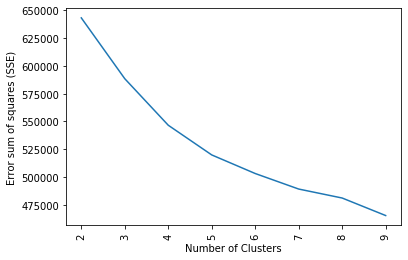

In [114]:
#Passing 20 components from above observation
pca = PCA(n_components = 30)
new_XVal = pca.fit(kmeansWithDummies).transform(kmeansWithDummies.values)
sse = []
#Try from 2 clusters to 10 clusters
numOfClusters = range(2,10)
for numClusters in numOfClusters:
    kmeans = KMeans(n_clusters = numClusters)
    kmeans = kmeans.fit(new_XVal)
    #Record the within-cluster-sum-of-square
    sse.append(kmeans.inertia_)
#Plot SSE and number of clusters
fig, (ax1) = plt.subplots(1)
ax1.plot(np.arange(len(numOfClusters)), sse)
ax1.set_xticks(np.arange(len(numOfClusters)))
ax1.set_xticklabels(numOfClusters, rotation='vertical')
#Labels
plt.xlabel('Number of Clusters')
plt.ylabel('Error sum of squares (SSE)')

<Figure size 432x288 with 0 Axes>

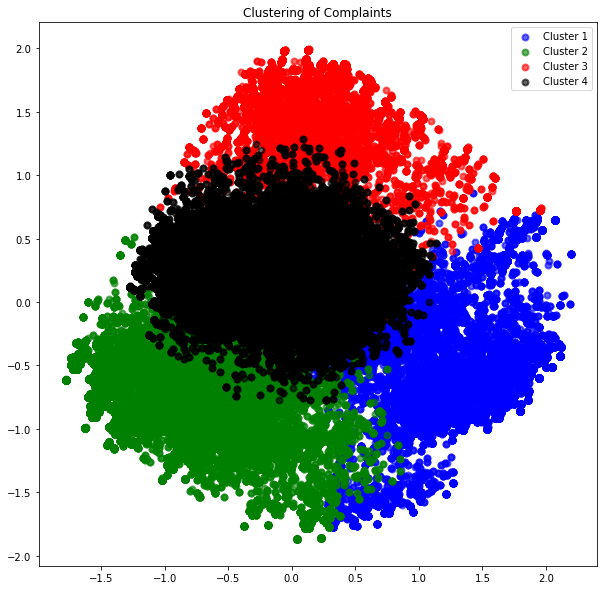

In [117]:
#Pick 3 for the number of clusters as observed above
kmeans = KMeans(n_clusters = 4,  random_state = 4)
kmeans = kmeans.fit(kmeansWithDummies.values)
predictions = kmeans.predict(kmeansWithDummies.values)

#Pick 20 for components as observed above
pca = PCA(n_components = 30)
new_XVal = pca.fit(kmeansWithDummies.values).transform(kmeansWithDummies.values)

plt.figure()
plt.figure(figsize=(10,10))
#Pick colors
colors = ['blue', 'green', 'red', 'black']
#Name of the clusters
clusterNames = ["Cluster 1","Cluster 2","Cluster 3", "Cluster 4"]

for color, i, clsName in zip(colors, [0, 1, 2, 3], clusterNames):
    plt.scatter(new_XVal[predictions == i, 0], new_XVal[predictions == i, 1], 
                color = color, alpha = 0.6, lw = 2,label = clsName)
    
plt.legend(loc='best', scatterpoints = 1)
plt.title('Clustering of Complaints')
plt.show()

In [118]:
clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
kmeansDataCopy['CLUSTERS'] = clusters

# Creating a cluster Category
kmeansDataCopy['CLUSTERS CATEGORY'] = 'No Data'
kmeansDataCopy['CLUSTERS CATEGORY'].loc[kmeansDataCopy['CLUSTERS'] == 1] = 'Cluster 1'
kmeansDataCopy['CLUSTERS CATEGORY'].loc[kmeansDataCopy['CLUSTERS'] == 2] = 'Cluster 2'
kmeansDataCopy['CLUSTERS CATEGORY'].loc[kmeansDataCopy['CLUSTERS'] == 3] = 'Cluster 3'
kmeansDataCopy['CLUSTERS CATEGORY'].loc[kmeansDataCopy['CLUSTERS'] == 4] = 'Cluster 4'

C:\Users\Deep\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [119]:
kmeansDataCopy

,CRM_ATPT_CPTD_CD,LAW_CAT_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,PATROL_BORO,PREM_TYP_DESC,OFNS_DESC,CLUSTERS,CLUSTERS CATEGORY
0,COMPLETED,VIOLATION,25-44,BLACK,M,65+,BLACK,M,PATROL BORO BKLYN SOUTH,RESIDENCE-HOUSE,HARRASSMENT 2,1,Cluster 1
1,COMPLETED,VIOLATION,25-44,WHITE,M,25-44,WHITE,F,PATROL BORO BKLYN SOUTH,RESIDENCE-HOUSE,HARRASSMENT 2,1,Cluster 1
4,COMPLETED,MISDEMEANOR,<18,BLACK,M,<18,BLACK,M,PATROL BORO BKLYN NORTH,STREET,ASSAULT 3 & RELATED OFFENSES,3,Cluster 3
7,COMPLETED,FELONY,<18,BLACK,M,<18,WHITE,F,PATROL BORO BKLYN SOUTH,STREET,ROBBERY,3,Cluster 3
8,COMPLETED,VIOLATION,UNKNOWN,UNKNOWN,U,25-44,BLACK,M,PATROL BORO BKLYN SOUTH,STREET,HARRASSMENT 2,0,No Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166706,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,45-64,UNKNOWN,M,PATROL BORO BKLYN SOUTH,OTHER,PETIT LARCENY,0,No Data
166707,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,25-44,UNKNOWN,M,PATROL BORO BKLYN NORTH,STREET,CRIMINAL MISCHIEF & RELATED OF,0,No Data
166709,COMPLETED,MISDEMEANOR,25-44,BLACK,M,25-44,BLACK,F,PATROL BORO BKLYN SOUTH,RESIDENCE - APT. HOUSE,ASSAULT 3 & RELATED OFFENSES,3,Cluster 3
166710,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,25-44,BLACK,M,PATROL BORO BKLYN NORTH,RESIDENCE - PUBLIC HOUSING,ASSAULT 3 & RELATED OFFENSES,0,No Data


Text(0, 0.5, 'Number of complaints')

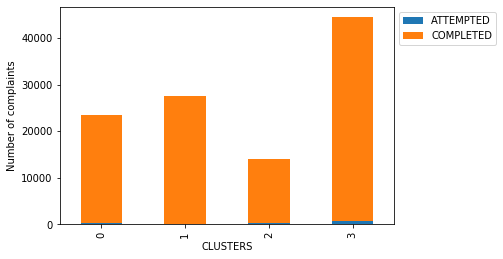

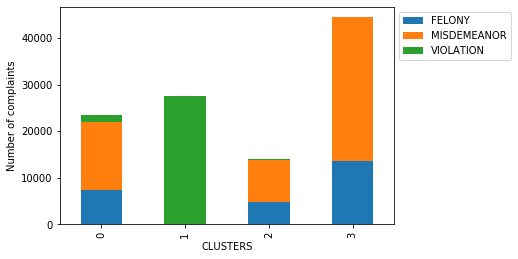

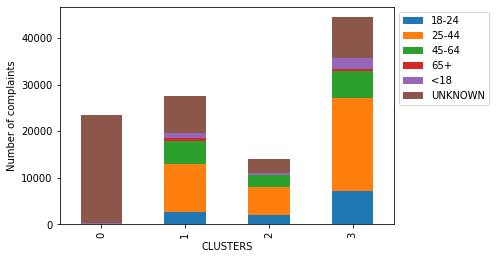

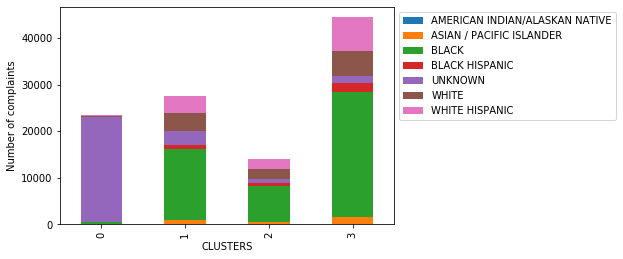

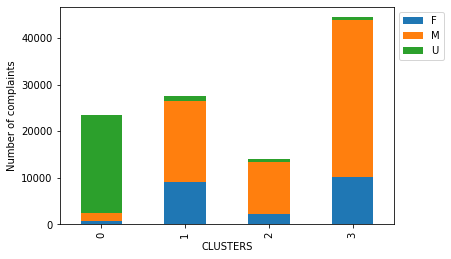

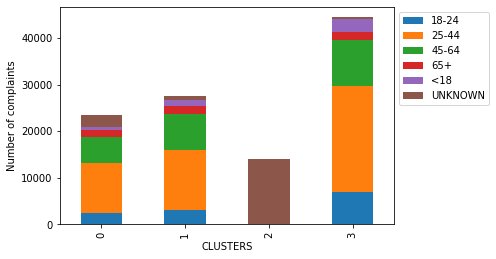

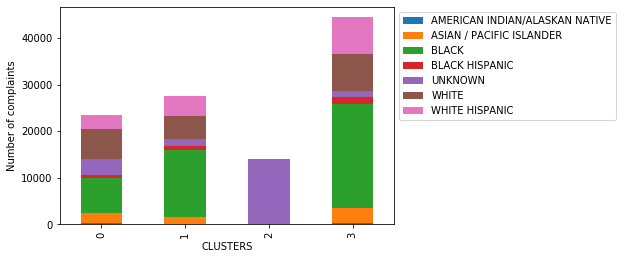

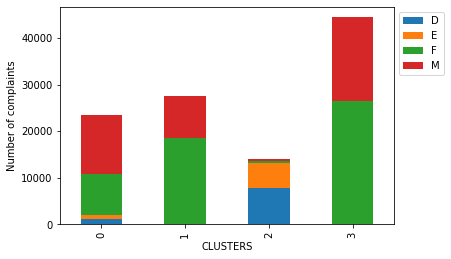

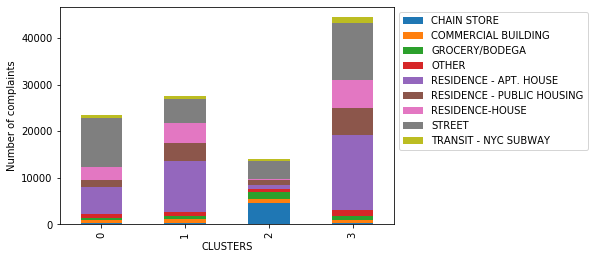

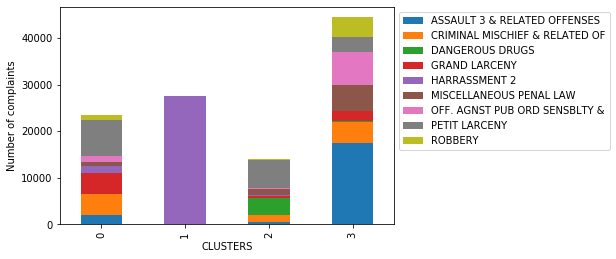

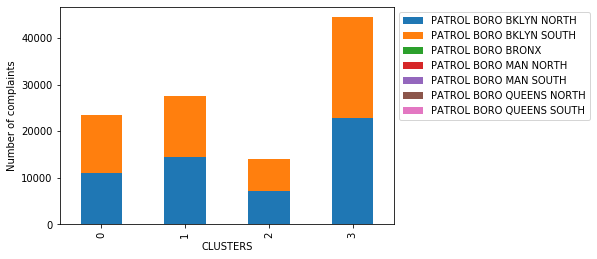

In [121]:
counts = kmeansDataCopy.groupby(['CLUSTERS', 'CRM_ATPT_CPTD_CD']).CRM_ATPT_CPTD_CD.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = kmeansDataCopy.groupby(['CLUSTERS', 'LAW_CAT_CD']).LAW_CAT_CD.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = kmeansDataCopy.groupby(['CLUSTERS', 'SUSP_AGE_GROUP']).SUSP_AGE_GROUP.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = kmeansDataCopy.groupby(['CLUSTERS', 'SUSP_RACE']).SUSP_RACE.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = kmeansDataCopy.groupby(['CLUSTERS', 'SUSP_SEX']).SUSP_SEX.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = kmeansDataCopy.groupby(['CLUSTERS', 'VIC_AGE_GROUP']).VIC_AGE_GROUP.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = kmeansDataCopy.groupby(['CLUSTERS', 'VIC_RACE']).VIC_RACE.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.ylabel('Number of complaints')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)

counts = kmeansDataCopy.groupby(['CLUSTERS', 'VIC_SEX']).VIC_SEX.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.ylabel('Number of complaints')

counts = kmeansDataCopy.groupby(['CLUSTERS', 'PREM_TYP_DESC']).PREM_TYP_DESC.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.ylabel('Number of complaints')

counts = kmeansDataCopy.groupby(['CLUSTERS' , 'OFNS_DESC']).PREM_TYP_DESC.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.ylabel('Number of complaints')

counts = kmeansDataCopy.groupby(['CLUSTERS' , 'PATROL_BORO']).PATROL_BORO.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.ylabel('Number of complaints')

In [ ]:
#Kmodes

In [76]:
#Filename
INPUT_FILE2 = 'processed-dataset-new.csv'
#Read the csv file and put it into dataframe
kmodesdf = pd.read_csv(INPUT_FILE2, header = 0)

In [77]:
kmodesdf = kmodesdf[ 
(kmodesdf['PREM_TYP_DESC'] == 'RESIDENCE - APT. HOUSE') |
(kmodesdf['PREM_TYP_DESC'] == 'STREET') |
(kmodesdf['PREM_TYP_DESC'] == 'RESIDENCE-HOUSE') |
(kmodesdf['PREM_TYP_DESC'] == 'RESIDENCE - PUBLIC HOUSING') |
(kmodesdf['PREM_TYP_DESC'] == 'CHAIN STORE') |
(kmodesdf['PREM_TYP_DESC'] == 'OTHER') |
(kmodesdf['PREM_TYP_DESC'] == 'TRANSIT - NYC SUBWAY') |
(kmodesdf['PREM_TYP_DESC'] == 'COMMERCIAL BUILDING') |
(kmodesdf['PREM_TYP_DESC'] == 'GROCERY/BODEGA') |
(kmodesdf['PREM_TYP_DESC'] == 'DEPARTMENT STORED')
]

In [78]:
kmodesdf = kmodesdf[ 
(kmodesdf['OFNS_DESC'] == 'HARRASSMENT 2') |
(kmodesdf['OFNS_DESC'] == 'PETIT LARCENY') |
(kmodesdf['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES') |
(kmodesdf['OFNS_DESC'] == 'CRIMINAL MISCHIEF & RELATED OF') |
(kmodesdf['OFNS_DESC'] == 'GRAND LARCENY') |
(kmodesdf['OFNS_DESC'] == 'OFF. AGNST PUB ORD SENSBLTY &') |
(kmodesdf['OFNS_DESC'] == 'FELONY ASSAULTY') |
(kmodesdf['OFNS_DESC'] == 'MISCELLANEOUS PENAL LAW') |
(kmodesdf['OFNS_DESC'] == 'ROBBERY') |
(kmodesdf['OFNS_DESC'] == 'DANGEROUS DRUGS')
]

In [79]:
kmodesdf

,CRM_ATPT_CPTD_CD,LAW_CAT_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,PATROL_BORO,PREM_TYP_DESC,OFNS_DESC
0,COMPLETED,VIOLATION,25-44,BLACK,M,65+,BLACK,M,PATROL BORO BKLYN SOUTH,RESIDENCE-HOUSE,HARRASSMENT 2
1,COMPLETED,VIOLATION,25-44,WHITE,M,25-44,WHITE,F,PATROL BORO BKLYN SOUTH,RESIDENCE-HOUSE,HARRASSMENT 2
4,COMPLETED,MISDEMEANOR,<18,BLACK,M,<18,BLACK,M,PATROL BORO BKLYN NORTH,STREET,ASSAULT 3 & RELATED OFFENSES
7,COMPLETED,FELONY,<18,BLACK,M,<18,WHITE,F,PATROL BORO BKLYN SOUTH,STREET,ROBBERY
8,COMPLETED,VIOLATION,UNKNOWN,UNKNOWN,U,25-44,BLACK,M,PATROL BORO BKLYN SOUTH,STREET,HARRASSMENT 2
...,...,...,...,...,...,...,...,...,...,...,...
166706,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,45-64,UNKNOWN,M,PATROL BORO BKLYN SOUTH,OTHER,PETIT LARCENY
166707,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,25-44,UNKNOWN,M,PATROL BORO BKLYN NORTH,STREET,CRIMINAL MISCHIEF & RELATED OF
166709,COMPLETED,MISDEMEANOR,25-44,BLACK,M,25-44,BLACK,F,PATROL BORO BKLYN SOUTH,RESIDENCE - APT. HOUSE,ASSAULT 3 & RELATED OFFENSES
166710,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,25-44,BLACK,M,PATROL BORO BKLYN NORTH,RESIDENCE - PUBLIC HOUSING,ASSAULT 3 & RELATED OFFENSES


In [80]:
#Make a copy of our original dataset
kmodesDataCopy = kmodesdf[features]
kmodesNewData = kmodesDataCopy.apply(preprocessing.LabelEncoder().fit_transform)

In [81]:
kmodesNewData

,CRM_ATPT_CPTD_CD,LAW_CAT_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,PATROL_BORO,PREM_TYP_DESC,OFNS_DESC
0,1,2,1,2,1,3,2,3,1,6,4
1,1,2,1,5,1,1,5,2,1,6,4
4,1,1,4,2,1,4,2,3,0,7,0
7,1,0,4,2,1,4,5,2,1,7,8
8,1,2,5,4,2,1,2,3,1,7,4
...,...,...,...,...,...,...,...,...,...,...,...
166706,1,1,5,4,2,2,4,3,1,3,7
166707,1,1,5,4,2,1,4,3,0,7,1
166709,1,1,1,2,1,1,2,2,1,4,0
166710,1,1,5,4,2,1,2,3,0,5,0


In [82]:
#Cost is similar to SSE
cost = []
#Try to create 9 clusters from 2-8
for numClusters in range(2,8):
    kmode = KModes(n_clusters = numClusters, init = "Cao", n_init = 1, verbose = 1)
    kmode.fit_predict(kmodesNewData)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16660, cost: 545647.0
Run 1, iteration: 2/100, moves: 11692, cost: 531723.0
Run 1, iteration: 3/100, moves: 8923, cost: 527905.0
Run 1, iteration: 4/100, moves: 955, cost: 527905.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15576, cost: 499859.0
Run 1, iteration: 2/100, moves: 5451, cost: 499859.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13758, cost: 487462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14744, cost: 472940.0
Run 1, iteration: 2/100, moves: 9535, cost: 461533.0
Run 1, iteration: 3/100, moves: 10432, cost: 451942.0
Run 1, iteration: 4/100, moves: 3382, cost: 451942.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, itera

Text(0, 0.5, 'Cost')

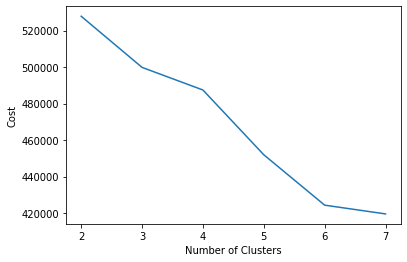

In [84]:
#Plot Cost and number of clusters
y = np.array([i for i in range(2,8,1)])
plt.plot(y,cost)
#Labels
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')

In [97]:
#Since we know 4 is the elbow
kmodes = KModes(n_clusters = 3 , init = "Cao", n_init = 1, verbose = 1)
kmodesPredictions = kmodes.fit_predict(kmodesNewData)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15576, cost: 499859.0
Run 1, iteration: 2/100, moves: 5451, cost: 499859.0


<Figure size 432x288 with 0 Axes>

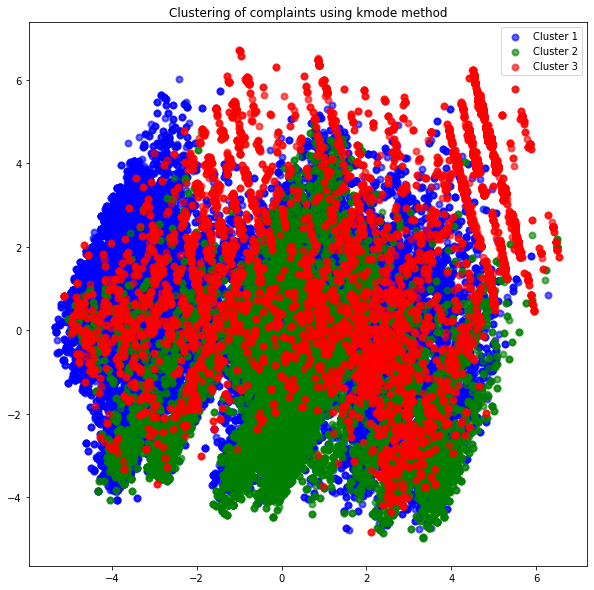

In [98]:
#Create an instance of PCA
pca = PCA()

#Cluster names
clusterNames = ["Cluster 1","Cluster 2","Cluster 3"]

#Fitting the values of X on a 2d plane
new_XVal = pca.fit(kmodesNewData.values).transform(kmodesNewData.values)

#Plot the clusters
plt.figure()
plt.figure(figsize=(10,10))
colors = ['blue', 'green', 'red']
for color, i, clsName in zip(colors, [0, 1, 2], clusterNames):
    plt.scatter(new_XVal[kmodesPredictions == i, 0], new_XVal[kmodesPredictions == i, 1], 
                color = color, alpha = 0.6, lw = 2,label = clsName)
    
plt.legend(loc = 'best', scatterpoints = 1)
plt.title('Clustering of complaints using kmode method')
plt.show()

In [92]:
#Put all the clusters in a new dataframe
newDataFrameToAdd = pd.DataFrame(kmodesPredictions)
#Add a cluster column
newDataFrameToAdd.columns = ['clusters']
#Concat initial dataframe and cluster data frame
tempDataFrame = pd.concat([kmodesDataCopy, newDataFrameToAdd], axis = 1).reset_index()
#Drop the index column that was inherit during concat process
finalDataFrame = tempDataFrame.drop(['index'], axis = 1)

In [93]:
finalDataFrame

,CRM_ATPT_CPTD_CD,LAW_CAT_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,PATROL_BORO,PREM_TYP_DESC,OFNS_DESC,clusters
0,COMPLETED,VIOLATION,25-44,BLACK,M,65+,BLACK,M,PATROL BORO BKLYN SOUTH,RESIDENCE-HOUSE,HARRASSMENT 2,1.0
1,COMPLETED,VIOLATION,25-44,WHITE,M,25-44,WHITE,F,PATROL BORO BKLYN SOUTH,RESIDENCE-HOUSE,HARRASSMENT 2,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,COMPLETED,MISDEMEANOR,<18,BLACK,M,<18,BLACK,M,PATROL BORO BKLYN NORTH,STREET,ASSAULT 3 & RELATED OFFENSES,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
146936,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,45-64,UNKNOWN,M,PATROL BORO BKLYN SOUTH,OTHER,PETIT LARCENY,NaN
146937,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,25-44,UNKNOWN,M,PATROL BORO BKLYN NORTH,STREET,CRIMINAL MISCHIEF & RELATED OF,NaN
146938,COMPLETED,MISDEMEANOR,25-44,BLACK,M,25-44,BLACK,F,PATROL BORO BKLYN SOUTH,RESIDENCE - APT. HOUSE,ASSAULT 3 & RELATED OFFENSES,NaN
146939,COMPLETED,MISDEMEANOR,UNKNOWN,UNKNOWN,U,25-44,BLACK,M,PATROL BORO BKLYN NORTH,RESIDENCE - PUBLIC HOUSING,ASSAULT 3 & RELATED OFFENSES,NaN
